
In-Degree Centrality (Most Referenced Philosophers):
[('Plato', 0.8), ('Aristotle', 0.7333333333333333), ('Epicurus', 0.5333333333333333), ('John Locke', 0.5333333333333333), ('René Descartes', 0.5333333333333333)]

Out-Degree Centrality (Philosophers Making Most References):
[('Friedrich Nietzsche', 0.8666666666666667), ('Arthur Schopenhauer', 0.6), ('Bertrand Russell', 0.5333333333333333), ('Gottfried Leibniz', 0.5333333333333333), ('David Hume', 0.4666666666666667)]


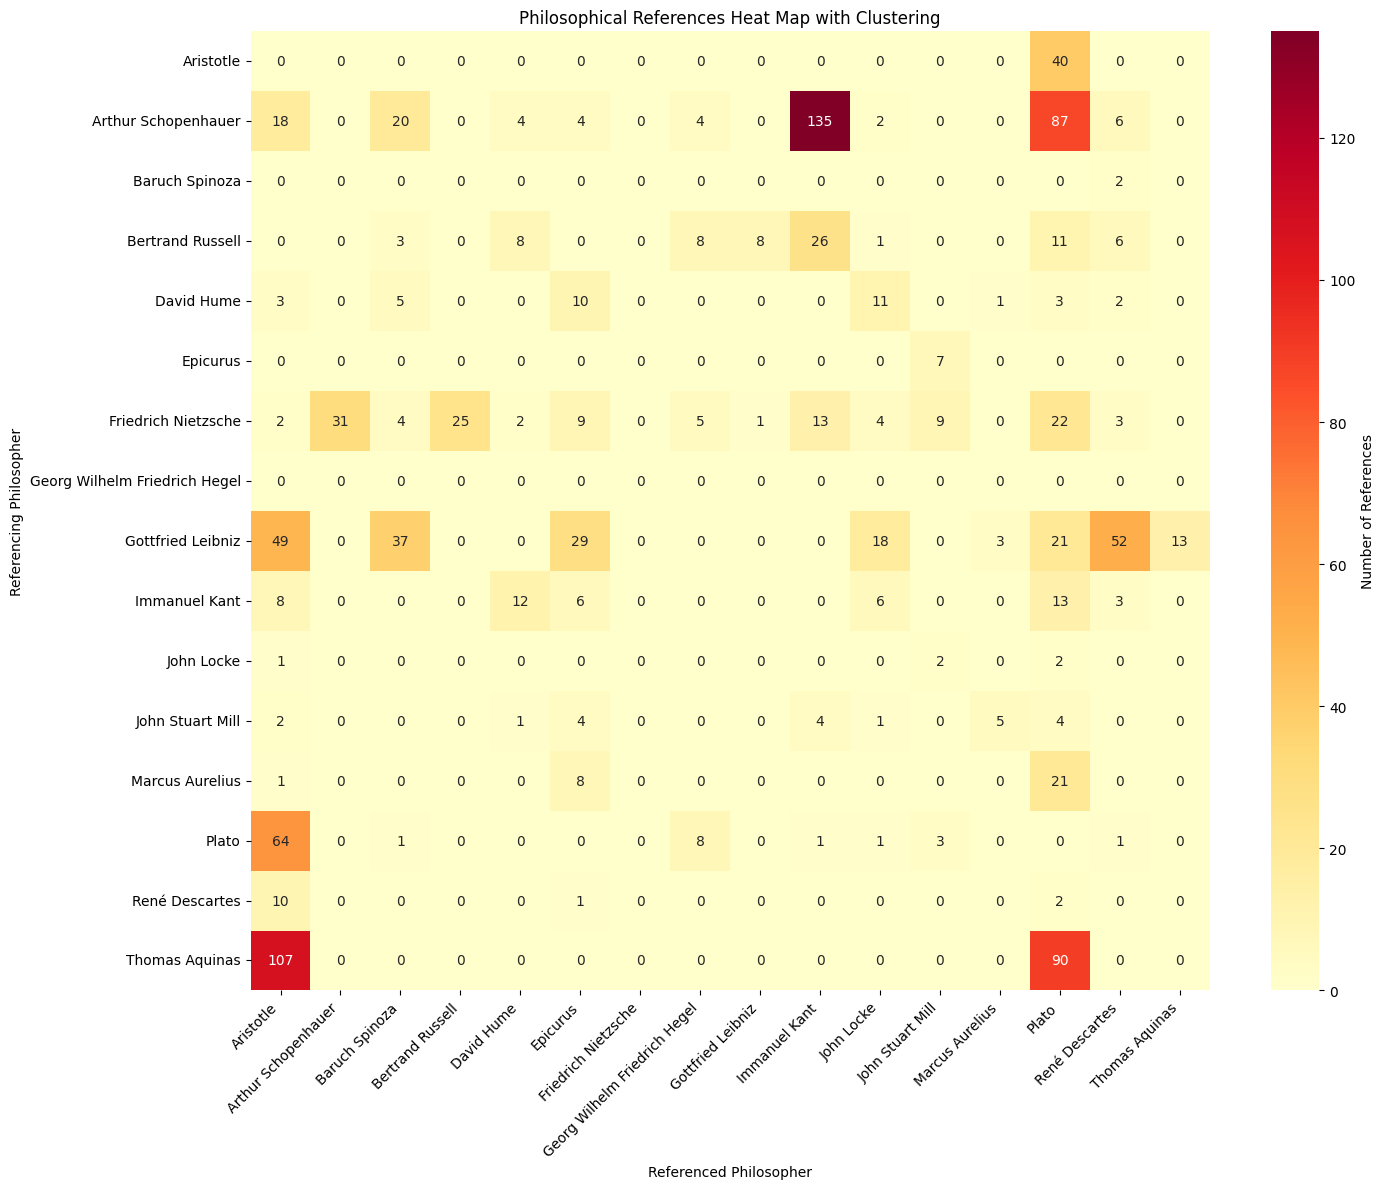


Philosophers and their assigned clusters:


,Philosopher,Cluster
0,Aristotle,0
2,Baruch Spinoza,0
3,Bertrand Russell,0
4,David Hume,0
5,Epicurus,0
6,Friedrich Nietzsche,0
7,Georg Wilhelm Friedrich Hegel,0
9,Immanuel Kant,0
10,John Locke,0
11,John Stuart Mill,0


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.cluster import AgglomerativeClustering
import numpy as np

# Function to analyze philosopher references and create heatmap
def analyze_philosopher_references(references_file='philosophical_references.csv'):
 
    df = pd.read_csv(references_file)
    authors = sorted(list(set(
        list(df['book_author'].unique()) + 
        list(df['referenced_author'].unique())
    )))

    matrix = pd.DataFrame(0, index=authors, columns=authors)
    for _, ref in df.iterrows():
        matrix.at[ref['book_author'], ref['referenced_author']] += 1
    G = nx.from_pandas_adjacency(matrix, create_using=nx.DiGraph())
    in_degree_centrality = nx.in_degree_centrality(G)
    out_degree_centrality = nx.out_degree_centrality(G)
    print("\nIn-Degree Centrality (Most Referenced Philosophers):")
    print(sorted(in_degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5])
    
    print("\nOut-Degree Centrality (Philosophers Making Most References):")
    print(sorted(out_degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5])
    reference_array = matrix.values
    
    # perform clustering to find groups
    clustering = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
    clusters = clustering.fit_predict(reference_array)
    
    matrix['cluster'] = clusters

    plt.figure(figsize=(15, 12))
    sns.heatmap(matrix.drop('cluster', axis=1), 
                annot=True, 
                fmt='d', 
                cmap='YlOrRd', 
                square=True, 
                cbar_kws={'label': 'Number of References'})
    
    plt.title('Philosophical References Heat Map with Clustering')
    plt.xlabel('Referenced Philosopher')
    plt.ylabel('Referencing Philosopher')
    
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    # Display the cluster assignment
    clustered_df = pd.DataFrame({'Philosopher': authors, 'Cluster': clusters})
    print("\nPhilosophers and their assigned clusters:")
    display(clustered_df.sort_values(by='Cluster'))

analyze_philosopher_references()



In-Degree Centrality (Most Referenced Philosophers):
[('Plato', 0.8), ('Aristotle', 0.7333333333333333), ('Epicurus', 0.5333333333333333), ('John Locke', 0.5333333333333333), ('René Descartes', 0.5333333333333333)]

Out-Degree Centrality (Philosophers Making Most References):
[('Friedrich Nietzsche', 0.8666666666666667), ('Arthur Schopenhauer', 0.6), ('Bertrand Russell', 0.5333333333333333), ('Gottfried Leibniz', 0.5333333333333333), ('David Hume', 0.4666666666666667)]


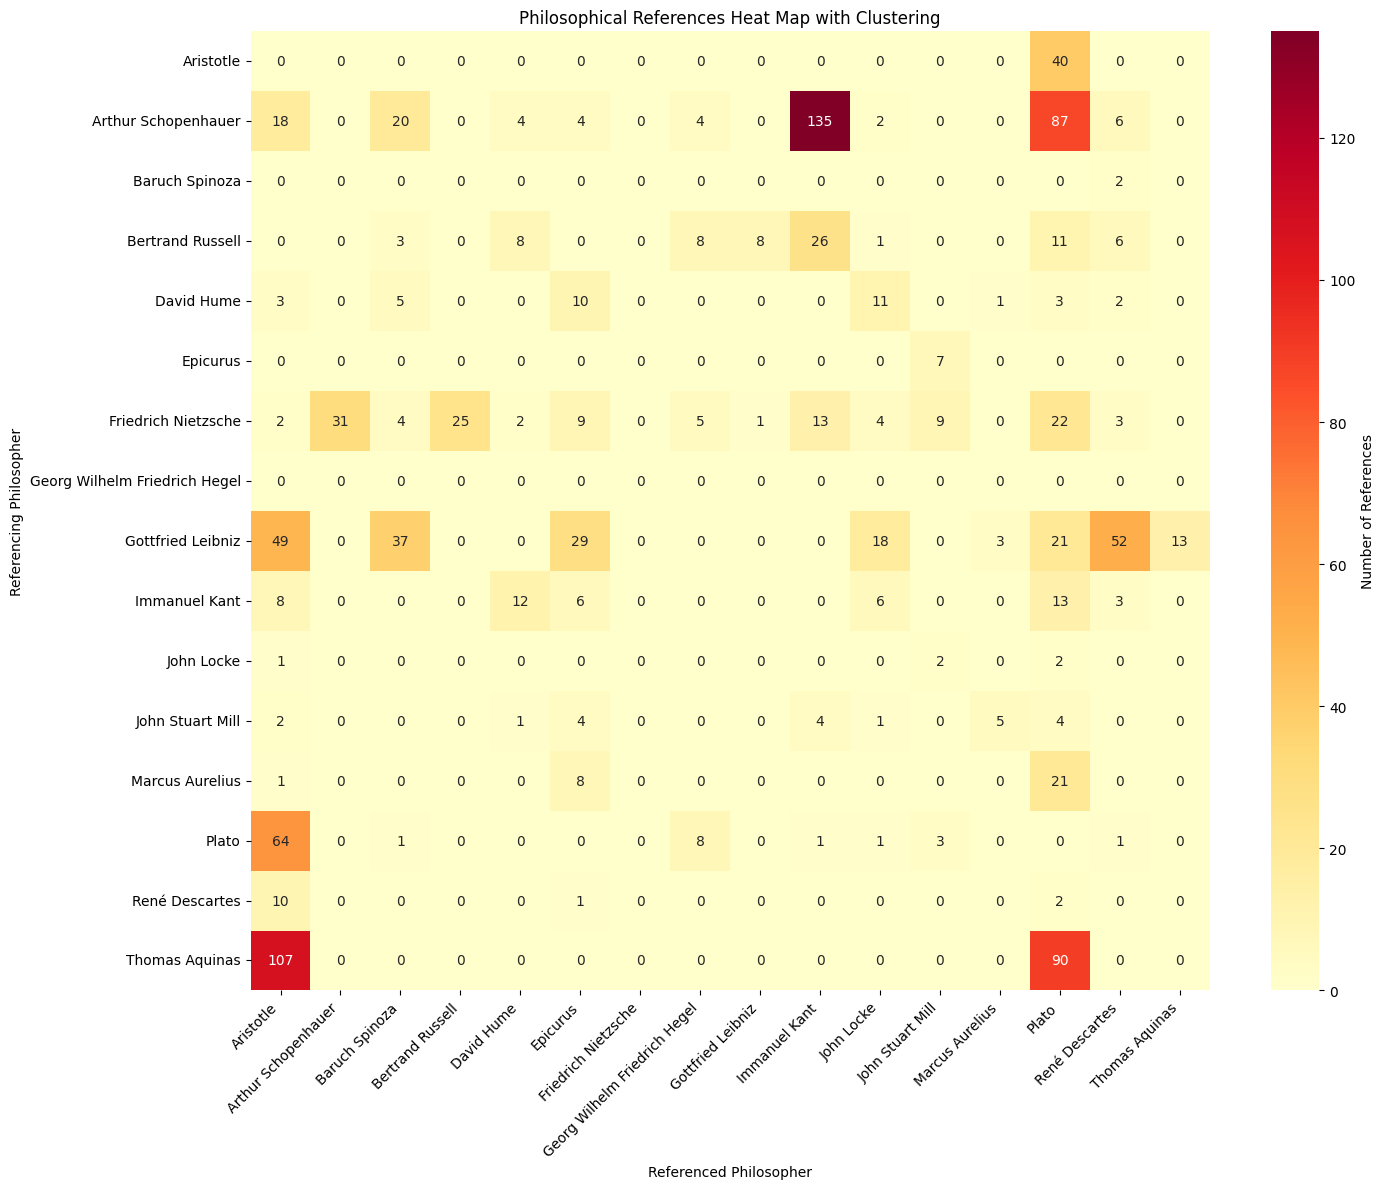


Philosophers and their assigned clusters:


,Philosopher,Cluster
0,Aristotle,0
2,Baruch Spinoza,0
3,Bertrand Russell,0
4,David Hume,0
5,Epicurus,0
6,Friedrich Nietzsche,0
7,Georg Wilhelm Friedrich Hegel,0
9,Immanuel Kant,0
10,John Locke,0
11,John Stuart Mill,0


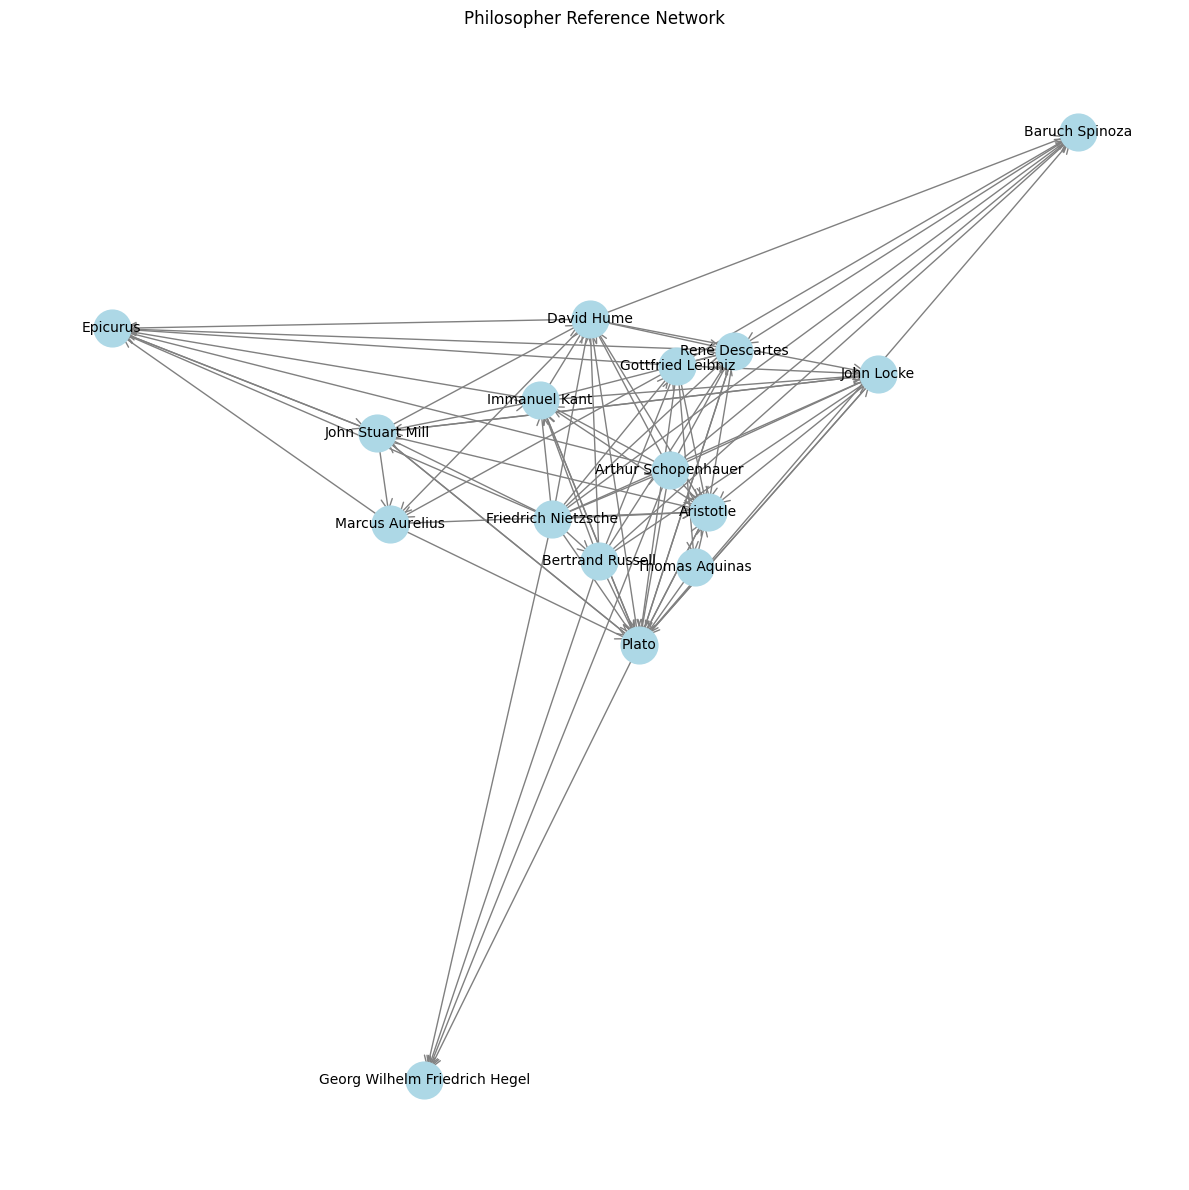

In [4]:
# Function to visualize the philosopher reference network
def visualize_reference_network(G):
    # Create a spring layout for the nodes
    pos = nx.spring_layout(G, k=0.5, seed=42)  # Adjust k for spacing, seed for reproducibility
    
    plt.figure(figsize=(12, 12))
    
    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color="lightblue")
    
    # Draw edges
    nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20, edge_color="gray")
    
    # Draw labels (philosophers' names)
    nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")
    
    # Title
    plt.title("Philosopher Reference Network")
    
    # Remove axis
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Adjust the previous function to return the graph `G`
def analyze_philosopher_references(references_file='philosophical_references.csv'):
    # Read the references data
    df = pd.read_csv(references_file)
    
    # Get unique authors (both referenced and referencing)
    authors = sorted(list(set(
        list(df['book_author'].unique()) + 
        list(df['referenced_author'].unique())
    )))
    
    # Create empty matrix
    matrix = pd.DataFrame(0, index=authors, columns=authors)
    
    # Fill matrix with reference counts
    for _, ref in df.iterrows():
        matrix.at[ref['book_author'], ref['referenced_author']] += 1
    
    # Create a graph from the matrix
    G = nx.from_pandas_adjacency(matrix, create_using=nx.DiGraph())
    
    # Calculate degree centrality
    in_degree_centrality = nx.in_degree_centrality(G)
    out_degree_centrality = nx.out_degree_centrality(G)
    
    # Display centrality statistics
    print("\nIn-Degree Centrality (Most Referenced Philosophers):")
    print(sorted(in_degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5])
    
    print("\nOut-Degree Centrality (Philosophers Making Most References):")
    print(sorted(out_degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5])
    
    # Convert the reference matrix to numpy array for clustering
    reference_array = matrix.values
    
    # Perform clustering to find groups of co-referenced philosophers
    clustering = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
    clusters = clustering.fit_predict(reference_array)
    
    # Add cluster labels to the matrix for better understanding
    matrix['cluster'] = clusters
    
    # Create a heatmap with clusters
    plt.figure(figsize=(15, 12))
    sns.heatmap(matrix.drop('cluster', axis=1), 
                annot=True, 
                fmt='d', 
                cmap='YlOrRd', 
                square=True, 
                cbar_kws={'label': 'Number of References'})
    
    plt.title('Philosophical References Heat Map with Clustering')
    plt.xlabel('Referenced Philosopher')
    plt.ylabel('Referencing Philosopher')
    
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    # Display the cluster assignment
    clustered_df = pd.DataFrame({'Philosopher': authors, 'Cluster': clusters})
    print("\nPhilosophers and their assigned clusters:")
    display(clustered_df.sort_values(by='Cluster'))
    
    return G  # Return the graph object for further analysis

# Call the function and visualize the network
G = analyze_philosopher_references()
visualize_reference_network(G)

In [5]:
import torch
from transformers import BertTokenizer, BertModel
import pandas as pd
from tqdm import tqdm  # For progress bar

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Make sure model is in evaluation mode (important for inference)
model.eval()

# Function to compute BERT embeddings
def get_bert_embeddings(text, tokenizer, model):
    # Tokenize the input text
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=512)
    
    # Pass the tokenized text through the model to get hidden states
    with torch.no_grad():
        outputs = model(**inputs)
    
    # Get the last hidden state (embeddings for all tokens)
    last_hidden_state = outputs.last_hidden_state
    
    # Compute the mean of the embeddings (average of all token embeddings in the sentence)
    sentence_embedding = torch.mean(last_hidden_state, dim=1).squeeze().numpy()
    
    return sentence_embedding

# Function to process the 'context' column and get embeddings for all sentences
def generate_context_embeddings(references_file='philosophical_references.csv'):
    # Load the CSV file
    df = pd.read_csv(references_file)
    
    # Ensure 'context' column exists
    if 'context' not in df.columns:
        raise ValueError("The 'context' column does not exist in the CSV file.")
    
    # Generate BERT embeddings for each context sentence
    embeddings = []
    for context in tqdm(df['context'], desc="Generating BERT embeddings"):
        embedding = get_bert_embeddings(context, tokenizer, model)
        embeddings.append(embedding)
    
    # Add the embeddings to the dataframe as a new column
    df['bert_embedding'] = embeddings
    
    return df

# Call the function to generate embeddings
df_with_embeddings = generate_context_embeddings()

# Display a portion of the dataframe with the new embeddings column
df_with_embeddings.head()

Generating BERT embeddings: 100%|██████████| 1180/1180 [01:33<00:00, 12.60it/s]


,source_book,book_author,referenced_author,matched_text,context,bert_embedding
0,Nicomachean Ethics,Aristotle,Plato,Plato,ithout too great encroachments on individual l...,"[-0.04291392, 0.17124891, -0.063011646, 0.0083..."
1,Nicomachean Ethics,Aristotle,Plato,Plato,"y dialogue of Plato's, the Protagoras, Socrate...","[0.013657839, 0.29385146, -0.12999302, 0.03802..."
2,Nicomachean Ethics,Aristotle,Plato,Plato,"to find teachers of swordsmanship, riding, or ...","[0.028306808, 0.24510168, -0.03998988, 0.01018..."
3,Nicomachean Ethics,Aristotle,Plato,Plato,owledge. The legislator is the only possible t...,"[-0.1350681, 0.22891532, 0.06284653, -0.088130..."
4,Nicomachean Ethics,Aristotle,Plato,Plato,up in heaven by which the just man may rule hi...,"[-0.15546617, 0.10677932, 0.032368924, -0.0421..."


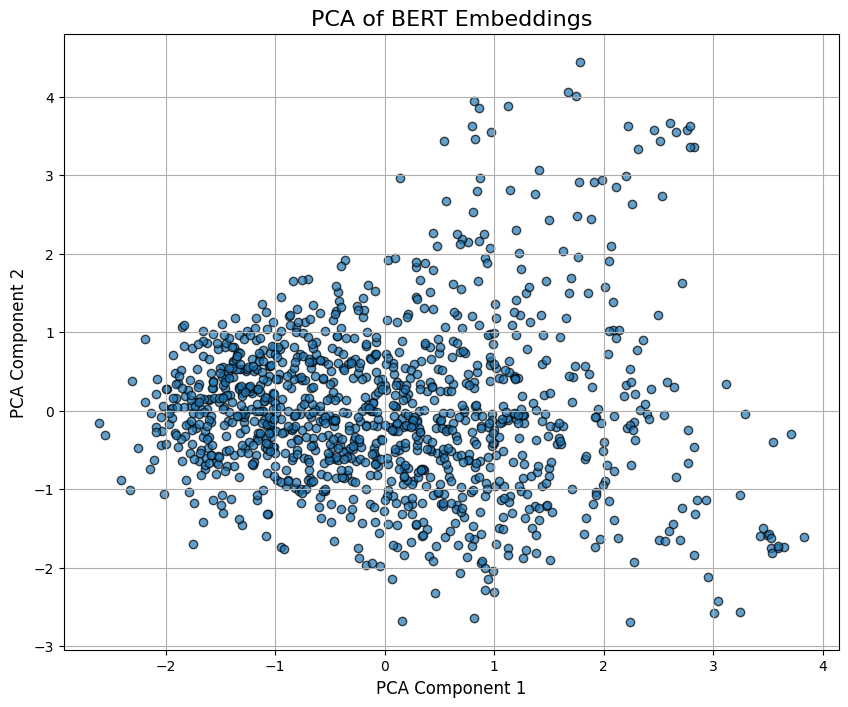

In [6]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Function to perform PCA and visualize embeddings
def visualize_pca_embeddings(df_with_embeddings):
    # Extract the BERT embeddings from the dataframe
    embeddings = list(df_with_embeddings['bert_embedding'])
    
    # Apply PCA to reduce embeddings to 2 dimensions
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(embeddings)
    
    # Create a scatter plot
    plt.figure(figsize=(10, 8))
    plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], alpha=0.7, edgecolors='k')
    
    # Add titles and labels
    plt.title('PCA of BERT Embeddings', fontsize=16)
    plt.xlabel('PCA Component 1', fontsize=12)
    plt.ylabel('PCA Component 2', fontsize=12)
    plt.grid(True)
    
    plt.show()

# Call the function to visualize the embeddings
visualize_pca_embeddings(df_with_embeddings)

/Users/robertbecker/Desktop/phil_smaller/bertopic_env/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


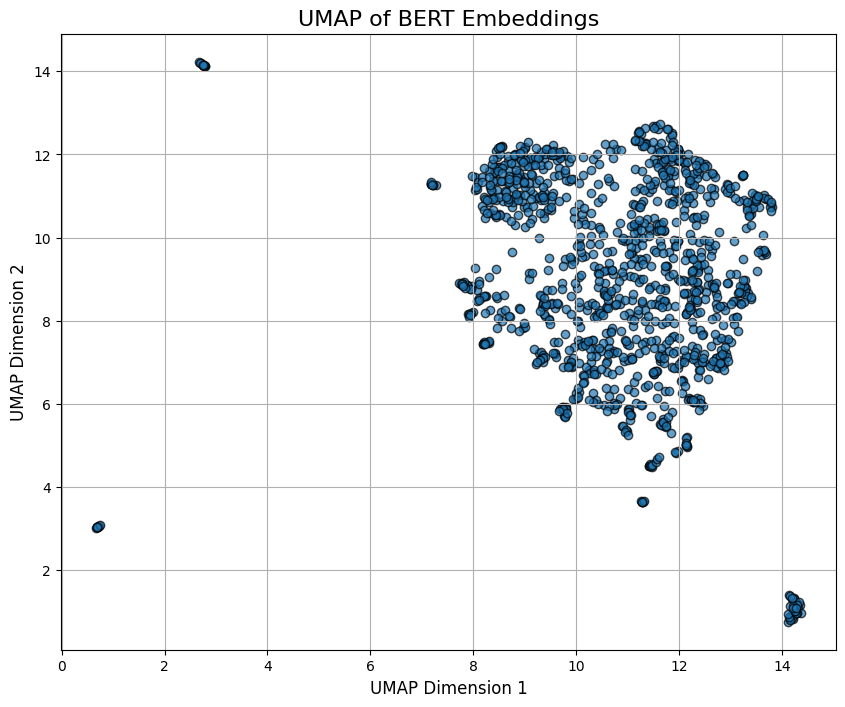

In [7]:
import umap

# Function to perform UMAP and visualize embeddings
def visualize_umap_embeddings(df_with_embeddings):
    # Extract the BERT embeddings from the dataframe
    embeddings = list(df_with_embeddings['bert_embedding'])
    
    # Apply UMAP to reduce embeddings to 2 dimensions
    umap_model = umap.UMAP(n_components=2, random_state=42)
    reduced_embeddings = umap_model.fit_transform(embeddings)
    
    # Create a scatter plot
    plt.figure(figsize=(10, 8))
    plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], alpha=0.7, edgecolors='k')
    
    # Add titles and labels
    plt.title('UMAP of BERT Embeddings', fontsize=16)
    plt.xlabel('UMAP Dimension 1', fontsize=12)
    plt.ylabel('UMAP Dimension 2', fontsize=12)
    plt.grid(True)
    
    plt.show()

# Call the function to visualize the embeddings
visualize_umap_embeddings(df_with_embeddings)

Shape of embeddings: (1180, 768)


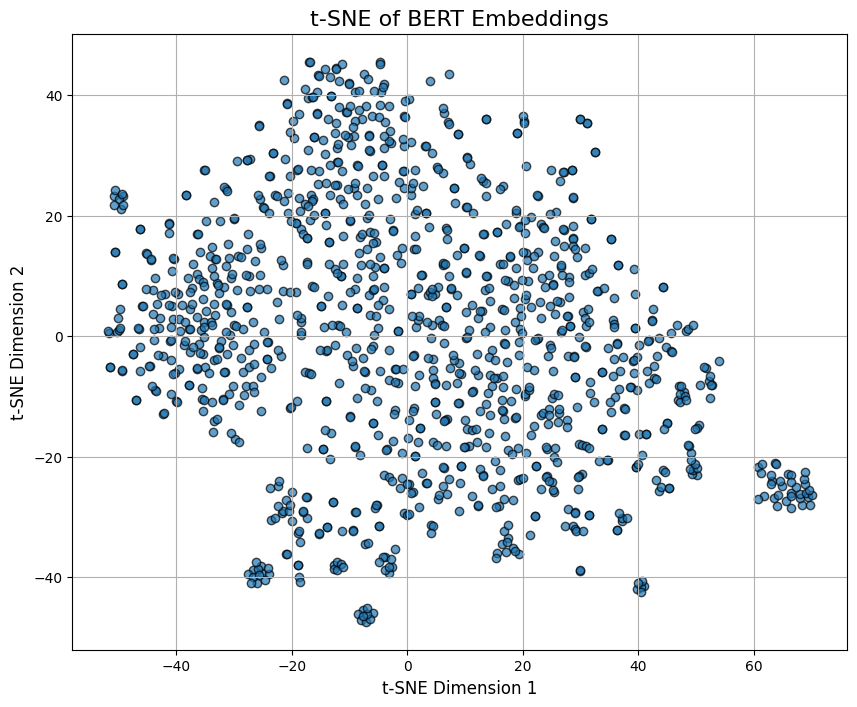

In [9]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

# Function to perform t-SNE and visualize embeddings
def visualize_tsne_embeddings(df_with_embeddings):
    # Extract the BERT embeddings from the dataframe
    embeddings = np.array(df_with_embeddings['bert_embedding'].tolist())
    
    # Check if embeddings have the correct shape
    print(f"Shape of embeddings: {embeddings.shape}")
    
    # Apply t-SNE to reduce embeddings to 2 dimensions
    tsne_model = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
    
    # Fit t-SNE and transform the embeddings
    reduced_embeddings = tsne_model.fit_transform(embeddings)
    
    # Create a scatter plot
    plt.figure(figsize=(10, 8))
    plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], alpha=0.7, edgecolors='k')
    
    # Add titles and labels
    plt.title('t-SNE of BERT Embeddings', fontsize=16)
    plt.xlabel('t-SNE Dimension 1', fontsize=12)
    plt.ylabel('t-SNE Dimension 2', fontsize=12)
    plt.grid(True)
    
    plt.show()

# Call the function to visualize the embeddings
visualize_tsne_embeddings(df_with_embeddings)

In [10]:
import umap
from sklearn.cluster import KMeans
import pandas as pd

# Step 1: Apply UMAP to reduce embeddings to 2 dimensions
def reduce_with_umap(df_with_embeddings, n_neighbors=15, min_dist=0.1, n_components=2, random_state=42):
    # Extract the BERT embeddings from the dataframe
    embeddings = list(df_with_embeddings['bert_embedding'])
    
    # Apply UMAP
    umap_model = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=n_components, random_state=random_state)
    reduced_embeddings = umap_model.fit_transform(embeddings)
    
    return reduced_embeddings

# Step 2: Apply K-Means clustering on the UMAP-reduced embeddings
def cluster_with_kmeans(reduced_embeddings, n_clusters=5):
    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(reduced_embeddings)
    
    return clusters

# Step 3: Display two examples of 'context' from each cluster
def display_cluster_examples(df_with_embeddings, clusters, n_examples=2):
    df_with_embeddings['cluster'] = clusters  # Add clusters to the dataframe
    
    # Iterate over each cluster and print two examples
    for cluster_num in range(max(clusters) + 1):
        print(f"\nCluster {cluster_num}:")
        
        # Filter rows belonging to the current cluster
        cluster_df = df_with_embeddings[df_with_embeddings['cluster'] == cluster_num]
        
        # Show n_examples from this cluster
        for i, context in enumerate(cluster_df['context'].head(n_examples)):
            print(f"Example {i + 1}: {context}")
        print("\n" + "-"*50)

# Combine everything
def umap_kmeans_clustering(df_with_embeddings, n_clusters=5):
    # Step 1: Reduce embeddings with UMAP
    reduced_embeddings = reduce_with_umap(df_with_embeddings)
    
    # Step 2: Apply K-Means
    clusters = cluster_with_kmeans(reduced_embeddings, n_clusters)
    
    # Step 3: Display examples
    display_cluster_examples(df_with_embeddings, clusters)

# Call the function to perform UMAP, K-Means clustering, and display context examples
umap_kmeans_clustering(df_with_embeddings, n_clusters=5)

/Users/robertbecker/Desktop/phil_smaller/bertopic_env/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



Cluster 0:
Example 1: philosophy will find it both easier and more profitable to read some of the works of the great philosophers than to attempt to derive an all-round view from handbooks. The following are specially recommended: Plato: _Republic_, especially Books VI and VII. Descartes: _Meditations_. Spinoza: _Ethics_. Leibniz: _The Monadology_. Berkeley: _Three Dialogues between Hylas and Philonous_. Hume: _Enquiry concerning Human Understanding_. Kant: _Prolegomena to any Future Metaphysic_. End of Project Gutenberg's The Problems of Philosophy, by Bertrand Russell
Example 2: ttempt to derive an all-round view from handbooks. The following are specially recommended: Plato: _Republic_, especially Books VI and VII. Descartes: _Meditations_. Spinoza: _Ethics_. Leibniz: _The Monadology_. Berkeley: _Three Dialogues between Hylas and Philonous_. Hume: _Enquiry concerning Human Understanding_. Kant: _Prolegomena to any Future Metaphysic_. End of Project Gutenberg's The Problems of Philo

In [11]:
import pandas as pd

# Step 1: Calculate how much each book contains each cluster
def count_clusters_per_book(df_with_embeddings):
    # Group by 'book_author' and 'cluster', then count occurrences
    book_cluster_counts = df_with_embeddings.groupby(['book_author', 'cluster']).size().unstack(fill_value=0)
    
    # Normalize counts by the total number of references per book (optional)
    book_cluster_proportions = book_cluster_counts.div(book_cluster_counts.sum(axis=1), axis=0)
    
    # Display the cluster distribution per book
    print("\nCluster distribution per book:")
    display(book_cluster_counts)
    
    # Return for further use if needed
    return book_cluster_counts, book_cluster_proportions

# Step 2: Calculate how much the top 10 referenced authors appear in each cluster
def count_references_to_top_authors(df_with_embeddings):
    # Count how many times each 'referenced_author' appears
    top_referenced_authors = df_with_embeddings['referenced_author'].value_counts().head(10).index
    
    # Filter the dataframe to include only the top 10 referenced authors
    top_authors_df = df_with_embeddings[df_with_embeddings['referenced_author'].isin(top_referenced_authors)]
    
    # Group by 'referenced_author' and 'cluster', then count occurrences
    author_cluster_counts = top_authors_df.groupby(['referenced_author', 'cluster']).size().unstack(fill_value=0)
    
    # Normalize counts by the total number of references per author (optional)
    author_cluster_proportions = author_cluster_counts.div(author_cluster_counts.sum(axis=1), axis=0)
    
    # Display the cluster distribution per referenced author
    print("\nCluster distribution per top 10 referenced authors:")
    display(author_cluster_counts)
    
    # Return for further use if needed
    return author_cluster_counts, author_cluster_proportions

# Combine both steps in a single function
def analyze_cluster_distribution(df_with_embeddings):
    # Step 1: Analyze cluster distribution per book
    book_cluster_counts, book_cluster_proportions = count_clusters_per_book(df_with_embeddings)
    
    # Step 2: Analyze cluster distribution for top 10 referenced authors
    author_cluster_counts, author_cluster_proportions = count_references_to_top_authors(df_with_embeddings)

# Call the function to perform the analysis
analyze_cluster_distribution(df_with_embeddings)


Cluster distribution per book:


cluster,0,1,2,3,4
book_author,,,,,
Aristotle,0,1,0,21,18
Arthur Schopenhauer,0,19,162,38,61
Baruch Spinoza,0,0,1,0,1
Bertrand Russell,6,0,57,4,4
David Hume,0,2,12,6,15
Epicurus,1,0,0,0,6
Friedrich Nietzsche,32,0,7,2,89
Gottfried Leibniz,0,8,78,53,83
Immanuel Kant,0,1,24,8,15



Cluster distribution per top 10 referenced authors:


cluster,0,1,2,3,4
referenced_author,,,,,
Aristotle,0,111,32,51,71
Arthur Schopenhauer,0,0,2,2,27
Baruch Spinoza,1,1,37,10,21
David Hume,1,0,15,2,9
Epicurus,0,2,17,17,35
Georg Wilhelm Friedrich Hegel,0,1,9,7,8
Immanuel Kant,1,2,118,10,48
John Locke,0,1,12,6,25
Plato,1,107,66,59,83


In [14]:
import torch
from transformers import BertTokenizer, BertModel
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Function to compute BERT embeddings
def get_bert_embedding(text, tokenizer, model):
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    # Return the mean of the last hidden state as the sentence embedding
    return torch.mean(outputs.last_hidden_state, dim=1).squeeze().numpy()

# Step 1: Compute embeddings for the 8 topic sentences
topics = [
    "The philosophical study of metaphysics",
    "The philosophical study of art",
    "The philosophical study of language",
    "The philosophical study of knowledge",
    "The philosophical study of science",
    "The philosophical study of mind",
    "The philosophical study of ethics",
    "The philosophical study of politics"
]

# Compute the embeddings for all topic sentences
topic_embeddings = {topic: get_bert_embedding(topic, tokenizer, model) for topic in topics}

# Step 2: Compute similarity for each context embedding with each topic
def compute_similarity(context_embedding, topic_embeddings):
    similarities = {
        topic: cosine_similarity(context_embedding.reshape(1, -1), topic_embedding.reshape(1, -1))[0][0]
        for topic, topic_embedding in topic_embeddings.items()
    }
    return similarities

# Step 3: Assign topics evenly across all contexts
def assign_even_topics_to_dataframe(df_with_embeddings, topic_embeddings):
    total_contexts = len(df_with_embeddings)
    num_topics = len(topic_embeddings)
    contexts_per_topic = total_contexts // num_topics
    
    # Create a list to store the assigned topic for each context
    assigned_topics = []
    
    # Shuffle the data to avoid bias in ordering
    df_with_embeddings = df_with_embeddings.sample(frac=1, random_state=42).reset_index(drop=True)
    
    # Create a count for each topic to ensure even distribution
    topic_count = {topic: 0 for topic in topic_embeddings.keys()}
    
    # Loop over each context and assign topics based on similarity, while enforcing even distribution
    for index, embedding in enumerate(df_with_embeddings['bert_embedding']):
        # Compute similarity for the current context
        embedding = embedding.reshape(1, -1)  # Reshape for comparison
        similarities = compute_similarity(embedding, topic_embeddings)
        
        # Sort topics by similarity, and assign the highest available topic with even distribution
        sorted_topics = sorted(similarities, key=similarities.get, reverse=True)
        
        # Assign the most similar topic that still has room for even distribution
        for topic in sorted_topics:
            if topic_count[topic] < contexts_per_topic or len(assigned_topics) < total_contexts:
                assigned_topics.append(topic)
                topic_count[topic] += 1
                break
    
    # Add the assigned topic to the dataframe
    df_with_embeddings['assigned_topic'] = assigned_topics

    return df_with_embeddings

# Step 4: Display 5 examples from each assigned topic
def display_examples_by_topic(df_with_topics, n_examples=5):
    unique_topics = df_with_topics['assigned_topic'].unique()
    
    for topic in unique_topics:
        print(f"\nTopic: {topic}")
        topic_examples = df_with_topics[df_with_topics['assigned_topic'] == topic]['context'].head(n_examples)
        
        for i, example in enumerate(topic_examples):
            print(f"Example {i + 1}: {example}")
        print("\n" + "-"*50)

# Run the whole process
df_with_embeddings = assign_even_topics_to_dataframe(df_with_embeddings, topic_embeddings)
display_examples_by_topic(df_with_embeddings)


Topic: The philosophical study of mind
Example 1: e._, an endless time, has already passed, so that everything that can or ought to become must have already done so. For all such historical philosophy, whatever airs it may give itself, regards _time_ just as if Kant had never lived, as a quality of the thing-in-itself, and thus stops at that which Kant calls the phenomenon in opposition to the thing-in-itself; which Plato calls the becoming and never being, in opposition to the being and never becoming; and which, finally, is called in the Indian philosophy the web of Mâya. It is just the knowledge which belongs to the principle of sufficient rea
Example 2: ion from this general rule of the nature of things. There is always a prevailing reason which prompts the will to its choice, and for the maintenance of freedom for the will it suffices that this reason should incline without necessitating. That is also the opinion of all the ancients, of Plato, of Aristotle, of St. Augustine. The 